In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
dbMovies = pd.read_csv("u.data", sep = "\t", names = ["user name", "item_id", "rating", "timestamp"])
dbMovies

,user name,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


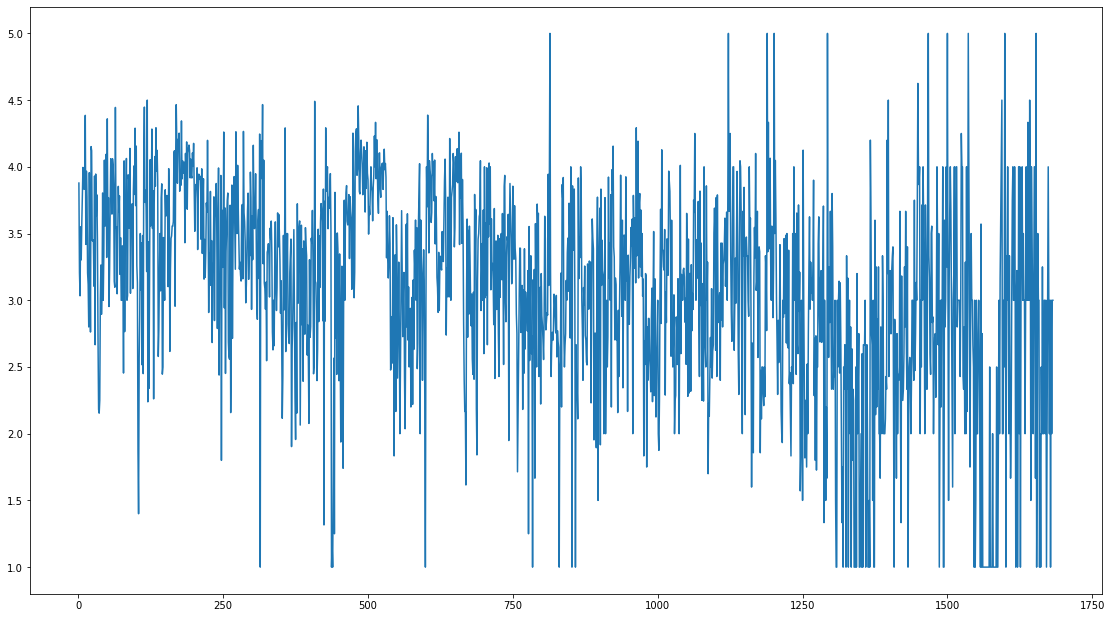

In [39]:
plt.figure(figsize = (19.2, 10.8))
fig = plt.plot(dbMovies.groupby("item_id").mean().drop(["timestamp", "user name"], axis = 1))
#plt.savefig("test.png")

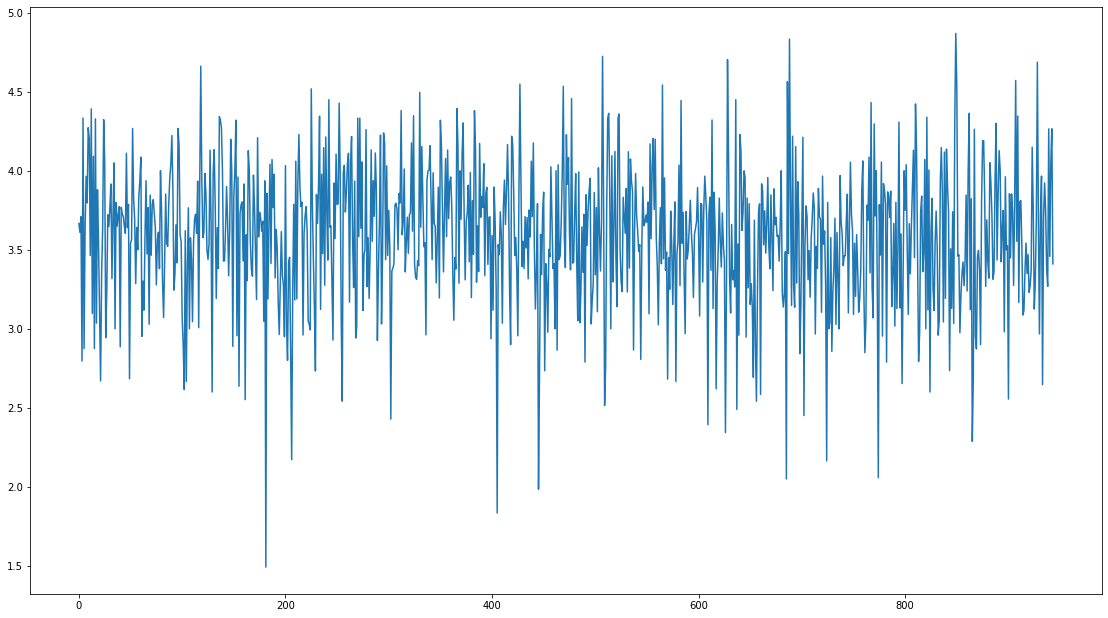

In [40]:
plt.figure(figsize = (19.2, 10.8))
plt.plot(dbMovies.groupby("user name").mean().drop(["item_id", "timestamp"], axis = 1))

In [41]:
dbMovies.groupby("user name").mean().drop(["item_id", "timestamp"], axis = 1)

,rating
user name,
0,3.666667
1,3.610294
2,3.709677
3,2.796296
4,4.333333
...,...
939,4.265306
940,3.457944
941,4.045455


In [108]:
movieTitle = pd.read_csv("Movie_Id_Titles")
movieTitle

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [95]:
test = "test"
#test[len(test) - 2, len(test)]
def reverse(input):
    
    output = ""
    length = len(input)
    for i in range(length):
        output  += input[length - 1 - i]
    
    return output

reverse(test)

'tset'

In [106]:
def year(input):
    
    temp = reverse(input)
    
    return reverse(temp[1:5])

In [109]:
movieTitle["year"] = movieTitle["title"].apply(year)
movieTitle

,item_id,title,year
0,1,Toy Story (1995),1995
1,2,GoldenEye (1995),1995
2,3,Four Rooms (1995),1995
3,4,Get Shorty (1995),1995
4,5,Copycat (1995),1995
...,...,...,...
1677,1678,Mat' i syn (1997),1997
1678,1679,B. Monkey (1998),1998
1679,1680,Sliding Doors (1998),1998
1680,1681,You So Crazy (1994),1994


In [110]:
movieTitle.groupby("year").count()

,item_id,title
year,,
) (V,1,1
1922,1,1
1926,1,1
1930,1,1
1931,1,1
...,...,...
1998,53,53
986),1,1
995),1,1


In [43]:
df = pd.merge(dbMovies, movieTitle, on = "item_id")

In [44]:
df

,user name,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [48]:
ratingsAvg = dbMovies.groupby("item_id").mean().drop(["timestamp", "user name"], axis = 1)
ratingsAvg = pd.merge(ratingsAvg.reset_index(), movieTitle, on = "item_id")
ratingsAvg

,item_id,rating,title
0,1,3.878319,Toy Story (1995)
1,2,3.206107,GoldenEye (1995)
2,3,3.033333,Four Rooms (1995)
3,4,3.550239,Get Shorty (1995)
4,5,3.302326,Copycat (1995)
...,...,...,...
1677,1678,1.000000,Mat' i syn (1997)
1678,1679,3.000000,B. Monkey (1998)
1679,1680,2.000000,Sliding Doors (1998)
1680,1681,3.000000,You So Crazy (1994)


In [54]:
ratingsCount = dbMovies.groupby("item_id").count()
ratingsCount["count"] = ratingsCount["user name"]
ratingsCount = ratingsCount.drop(["user name", "rating", "timestamp"], axis = 1).reset_index()
ratingsCount

,item_id,count
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [55]:
ratings = pd.merge(ratingsCount, ratingsAvg, on = "item_id")
ratings

,item_id,count,rating,title
0,1,452,3.878319,Toy Story (1995)
1,2,131,3.206107,GoldenEye (1995)
2,3,90,3.033333,Four Rooms (1995)
3,4,209,3.550239,Get Shorty (1995)
4,5,86,3.302326,Copycat (1995)
...,...,...,...,...
1677,1678,1,1.000000,Mat' i syn (1997)
1678,1679,1,3.000000,B. Monkey (1998)
1679,1680,1,2.000000,Sliding Doors (1998)
1680,1681,1,3.000000,You So Crazy (1994)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [57]:
lrModel = LinearRegression()

In [70]:
y = ratings["rating"]
x = ratings["count"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3)

AttributeError: 'Series' object has no attribute 'reshape'

In [71]:
lrModel.fit(xTrain, yTrain)

ValueError: Expected 2D array, got 1D array instead:
array=[ 8 24 12 ... 86 60 44].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [68]:
pred = lrModel.predict(xTest)

from sklearn.metrics import confusion_matrix

np.mean(yTest != pred)

1.0

In [69]:
lrModel.coef_

array([ 0.00290032, -0.00030848])